<a href="https://colab.research.google.com/github/PayalSahrma/Course/blob/master/Fashion_MNIST_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
import os

# give googe drive permission
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/NN_Colab")
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1clyOjhjAFaRHSJdsY0PeySdU957jPxQu/NN_Colab'

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 28.6 MB/s 
     |████████████████████████████████| 1.6 MB 62.4 MB/s 


## Imports

In [ ]:
import numpy as np
np.random.seed(42)
import pandas as pd
import math
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras.wrappers.scikit_learn import KerasClassifier

import keras_tuner as kt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

MNIST Fasion data set: Multiclass classification problem.

Training data has 60000, samples of images for each class can be one of the following.


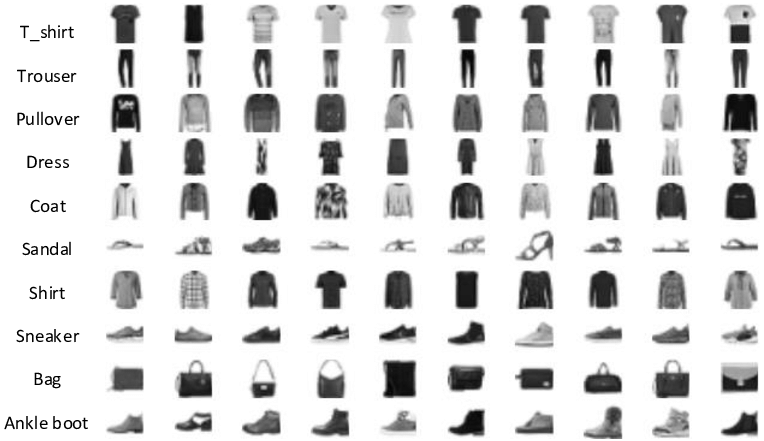

**Label definition**

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

**Image data**
- Each image is 28 by 28 pixels in size.

## Read Data

In [ ]:
!ls

'Fasion MNIST'	'House pricing'  'Mnist - Gradient Decent '


In [ ]:
# modify this cell based on your dirive and folder location

train = pd.read_csv("Fasion MNIST/fashion-mnist/train.csv")
test = pd.read_csv("Fasion MNIST/fashion-mnist/test.csv")

x_test = test.loc[:, test.columns != "label"]
y_test = test['label']

Visulize a sample from the training data.

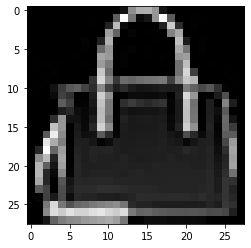

In [ ]:
Image_index = 11

img = train.loc[Image_index, train.columns != "label"].values.reshape((28,28))
plt.imshow(img,cmap='gray')

Split the data in train and validation set

In [ ]:
y_data = train['label'].values
x_data = train.drop('label',axis=1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.2, random_state=169)

## Plotting Functions

In [ ]:
def plot_accuracy_vs_epochs(i, history):
    fig = plt.figure(figsize=(6, 6))
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('Fasion MNIST/img_mnist_fashion/'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [ ]:
def plot_learning_rate(i, loss_history):
# plot learning rate
  fig = plt.figure()
  plt.plot(range(1,epochs+1),loss_history.lrate,label='learning rate')
  plt.xlabel("epoch")
  plt.xlim([1,epochs+1])
  plt.ylabel("learning rate")
  plt.legend(loc=0)
  plt.grid(True)
  plt.title("Learning rate")
  plt.show()
  fig.savefig('Fasion MNIST/img_mnist_fashion/'+str(i)+'-learning_rate.jpg')
  plt.close(fig)

In [ ]:
def model_prediction(model, loc_num):
  model.predict(x_test).argmax(axis=1)

  img = x_test.iloc[loc_num].values.reshape((28,28))
  plt.imshow(img,cmap='gray')
  print("The predicted label is:" ,model.predict(x_test).argmax(axis=1)[loc_num])
  print("The actual label is: ", y_test[loc_num])

## Model Building Fuction

In [ ]:
def nn_model_fancy(perceptrons_in_each_layer,
                   hidden_activation,
                   initializer,
                   dropout_rate,
                   optimiser_type,
                   loss_fuction):
    model = keras.Sequential([
            # input layer
            keras.layers.Dense(perceptrons_in_each_layer, # hyperparameter
                               activation= hidden_activation , # hyperparameter
                               input_shape=(784,),
                               kernel_initializer=initializer # hyperparameter
                               ),
            # hidden layer 1
            keras.layers.Dense(perceptrons_in_each_layer,
                               activation= hidden_activation,
                               kernel_initializer=initializer
                               ),
            # hidden layer 2
            keras.layers.Dense(perceptrons_in_each_layer,
                               activation= hidden_activation,
                               kernel_initializer=initializer
                               ),

            keras.layers.Dropout(dropout_rate), # hyperparameter
            # Output layer
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ]
    )
    model.summary()

    model.compile(optimizer = optimiser_type, # hyperparameter
                  loss = loss_fuction,  # hyperparameter
                  metrics = ['accuracy'])

    return model

#### Basic Model

In [ ]:
basic_model = nn_model_fancy (
perceptrons_in_each_layer = 128,
hidden_activation = "relu",
initializer = tf.keras.initializers.RandomNormal(stddev=0.01),
dropout_rate = 0 ,
optimiser_type = tf.keras.optimizers.SGD(learning_rate=0.001),
loss_fuction = "sparse_categorical_crossentropy",
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 15

basic_model_history = basic_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.9840 - accuracy: 0.6779 - val_loss: 0.6478 - val_accuracy: 0.7628
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.5974 - accuracy: 0.7897 - val_loss: 0.5518 - val_accuracy: 0.8029
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.5240 - accuracy: 0.8194 - val_loss: 0.4946 - val_accuracy: 0.8255
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.4874 - accuracy: 0.8307 - val_loss: 0.4601 - val_accuracy: 0.8397
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.4614 - accuracy: 0.8395 - val_loss: 0.4618 - val_accuracy: 0.8363
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.4442 - accuracy: 0.8451 - val_loss: 0.4359 - val_accuracy: 0.8434
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.4251 - accuracy: 0.8510 - val_loss: 0.4256 - val_accuracy: 0.8485
Epoch 

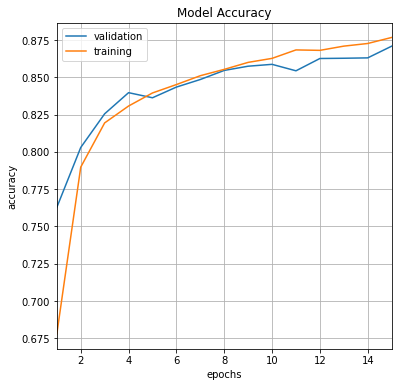

In [ ]:
plot_accuracy_vs_epochs(1, basic_model_history)

#### Learning Rate scheduling: **Step Decay**

In [ ]:
# Manual setup for modifying leraning rates per epoch
# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.lrate = []

    def on_epoch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        self.lrate.append(step_decay(len(self.loss)))
        print('lrate:', step_decay(len(self.loss)))

def step_decay(epoch):
    initial_lrate = 0.005
    drop = 0.5 # new learning rate will be square root of the old leraning rate
    drop_after_epochs = 2
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/drop_after_epochs))
    return lrate

In [ ]:
step_scheduling_model = nn_model_fancy (
perceptrons_in_each_layer = 128,
hidden_activation = "relu",
initializer = tf.keras.initializers.RandomNormal(stddev=0.01),
dropout_rate = 0 ,
optimiser_type = tf.keras.optimizers.SGD(),
loss_fuction = "sparse_categorical_crossentropy",
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 15

# learning schedule callback
lrate_step_decay = LearningRateScheduler(step_decay)
loss_history_step_decay = LossHistory()
callbacks_list = [loss_history_step_decay, lrate_step_decay]

step_scheduling_model_history = step_scheduling_model.fit(X_train, y_train,
                                                          batch_size=batch_size,
                                                          epochs=epochs,
                                                          validation_data=(X_val, y_val),
                                                          callbacks=callbacks_list)

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.7145 - accuracy: 0.7422 - val_loss: 0.4917 - val_accuracy: 0.8213 - lr: 0.0050
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.4660 - accuracy: 0.8321 - val_loss: 0.4543 - val_accuracy: 0.8357 - lr: 0.0050
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3855 - accuracy: 0.8600 - val_loss: 0.3826 - val_accuracy: 0.8614 - lr: 0.0025
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3684 - accuracy: 0.8676 - val_loss: 0.3781 - val_accuracy: 0.8626 - lr: 0.0025
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3414 - accuracy: 0.8775 - val_loss: 0.3587 - val_accuracy: 0.8700 - lr: 0.0012
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3324 - accuracy: 0.8802 - val_loss: 0.3592 - val_accuracy: 0.8702 - lr: 0.0012
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - lo

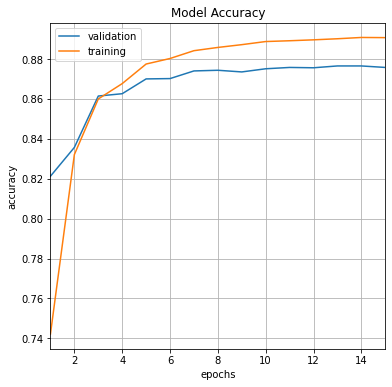

In [ ]:
plot_accuracy_vs_epochs(2, step_scheduling_model_history)

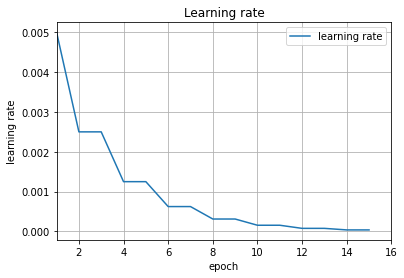

In [ ]:
plot_learning_rate(2, loss_history_step_decay)

#### Adaptive Optimiser: **Adam**

In [ ]:
adam_optimiser_model = nn_model_fancy (
perceptrons_in_each_layer = 128,
hidden_activation = "relu",
initializer = tf.keras.initializers.RandomNormal(stddev=0.01),
dropout_rate = 0 ,
optimiser_type = "adam",
loss_fuction = "sparse_categorical_crossentropy",
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 15

adam_optimiser_model_history = adam_optimiser_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
375/375 [==============================] - 3s 7ms/step - loss: 0.5698 - accuracy: 0.7908 - val_loss: 0.4475 - val_accuracy: 0.8353
Epoch 2/15
375/375 [==============================] - 2s 6ms/step - loss: 0.4053 - accuracy: 0.8519 - val_loss: 0.3754 - val_accuracy: 0.8617
Epoch 3/15
375/375 [==============================] - 2s 6ms/step - loss: 0.3812 - accuracy: 0.8629 - val_loss: 0.4047 - val_accuracy: 0.8562
Epoch 4/15
375/375 [==============================] - 2s 6ms/step - loss: 0.3512 - accuracy: 0.8719 - val_loss: 0.3550 - val_accuracy: 0.8716
Epoch 5/15
375/375 [==============================] - 2s 6ms/step - loss: 0.3355 - accuracy: 0.8766 - val_loss: 0.3716 - val_accuracy: 0.8675
Epoch 6/15
375/375 [==============================] - 2s 6ms/step - loss: 0.3244 - accuracy: 0.8813 - val_loss: 0.3558 - val_accuracy: 0.8745
Epoch 7/15
375/375 [==============================] - 2s 6ms/step - loss: 0.3105 - accuracy: 0.8863 - val_loss: 0.3504 - val_accuracy: 0.8724
Epoch 

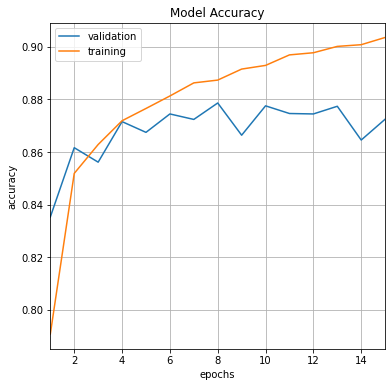

In [ ]:
plot_accuracy_vs_epochs(3, adam_optimiser_model_history)

## Hyperparameter Tuning

### Tuning the architecture with KerasTuner

In [ ]:
hp = kt.HyperParameters()

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    # input layer
    model.add(
        layers.Dense(input_shape=(784,),
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # hidden layer 1
    model.add(
        layers.Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # Hidden layer 2
    model.add(
        layers.Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(10, activation="softmax"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="Arch_tuning_dir",
    project_name="Fashion_MNIST",
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
tuner.search(X_train, y_train, epochs=2, validation_data=(X_val, y_val))

Trial 3 Complete [00h 01m 09s]
val_loss: 0.7691256701946259

Best val_loss So Far: 0.5338768064975739
Total elapsed time: 00h 02m 49s


In [ ]:
tuner.results_summary()

Results summary
Results in Arch_tuning_dir/Fashion_MNIST
Showing 10 best trials
Trial summary
Hyperparameters:
units: 320
activation: relu
dropout: True
lr: 0.00014910815026432205
Score: 0.5338768064975739
Trial summary
Hyperparameters:
units: 160
activation: tanh
dropout: True
lr: 0.00040536211023129484
Score: 0.7608900666236877
Trial summary
Hyperparameters:
units: 384
activation: tanh
dropout: False
lr: 0.00039231791838165793
Score: 0.7691256701946259


### Grid search for rest of the parameters

Use the optimised archtecture and tune other parameters

In [ ]:
model=KerasClassifier(build_fn = nn_model_fancy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
params={'perceptrons_in_each_layer': [ 160],
        'hidden_activation': ["tanh" ],
        'initializer': [tf.keras.initializers.RandomNormal(mean=0., stddev=1.), tf.keras.initializers.Zeros(), tf.keras.initializers.Ones() ],
        'dropout_rate': [0.25],
        'optimiser_type': [tf.keras.optimizers.SGD(learning_rate=0.0004) , "adam", "adagrad"],
        'loss_fuction': ["sparse_categorical_crossentropy" ],
        'nb_epoch':[15]
        }

gs=GridSearchCV(estimator=model, param_grid=params, cv=2)

# now fit the dataset to the GridSearchCV object.
gs = gs.fit(train_x, train_y)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 160)               125600    
                                                                 
 dense_89 (Dense)            (None, 160)               25760     
                                                                 
 dense_90 (Dense)            (None, 160)               25760     
                                                                 
 dropout_21 (Dropout)        (None, 160)               0         
                                                                 
 dense_91 (Dense)            (None, 10)                1610      
                                                                 
Total params: 178,730
Trainable params: 178,730
Non-trainable params: 0
_________________________________________________________________
938/938 [==============================] - 2s 2

In [ ]:
gs.best_params_

{'dropout_rate': 0.25,
 'hidden_activation': 'tanh',
 'initializer': <keras.initializers.initializers_v2.RandomNormal at 0x7f00f7c04e10>,
 'loss_fuction': 'sparse_categorical_crossentropy',
 'nb_epoch': 15,
 'optimiser_type': 'adam',
 'perceptrons_in_each_layer': 160}

In [ ]:
gs.best_score_

0.7889999747276306

## Early Stopping

In [ ]:
callback_early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
Early_stopping_model = nn_model_fancy (
perceptrons_in_each_layer = 160,
hidden_activation = "tanh",
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.),
dropout_rate = 0.25 ,
optimiser_type = "adam",
loss_fuction = "sparse_categorical_crossentropy",
)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 160)               125600    
                                                                 
 dense_165 (Dense)           (None, 160)               25760     
                                                                 
 dense_166 (Dense)           (None, 160)               25760     
                                                                 
 dropout_40 (Dropout)        (None, 160)               0         
                                                                 
 dense_167 (Dense)           (None, 10)                1610      
                                                                 
Total params: 178,730
Trainable params: 178,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 100

Early_stopping_model_history_with_early_stopping = Early_stopping_model.fit(X_train, y_train,
                                                        batch_size=batch_size,
                                                        epochs=epochs,
                                                        callbacks=[callback_early_stop],
                                                        validation_data=(X_val, y_val))

Epoch 1/100
375/375 [==============================] - 4s 9ms/step - loss: 1.4886 - accuracy: 0.4842 - val_loss: 0.9400 - val_accuracy: 0.6528
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 0.9677 - accuracy: 0.6432 - val_loss: 0.8336 - val_accuracy: 0.6918
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 0.8697 - accuracy: 0.6805 - val_loss: 0.7818 - val_accuracy: 0.7128
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 0.8261 - accuracy: 0.6976 - val_loss: 0.7603 - val_accuracy: 0.7170
Epoch 5/100
375/375 [==============================] - 4s 11ms/step - loss: 0.8131 - accuracy: 0.7039 - val_loss: 0.7660 - val_accuracy: 0.7125
Epoch 6/100
375/375 [==============================] - 4s 10ms/step - loss: 0.8051 - accuracy: 0.7008 - val_loss: 0.7429 - val_accuracy: 0.7197
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 0.7782 - accuracy: 0.7084 - val_loss: 0.7416 - val_accuracy: 0.72

## Manual Prediction check

313/313 [==============================] - 1s 2ms/step
The predicted label is: 0
The actual label is:  0


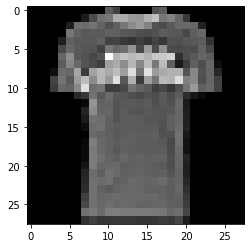

In [ ]:
model_prediction(Early_stopping_model, 9)

**Label defination**

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

## Overall Test Accuracy

In [ ]:
y_pred = Early_stopping_model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.7403